#**Model Interpretability**

#**Abstract**

The focus of the previous notebooks was to conduct a comprehensive analysis of the "Health & Development Indicators: Global Insights" dataset. To accomplish this, I started with data preprocessing tasks such as data cleaning, handling missing values, and encoding categorical variables including exploratory data analysis to identify patterns, trends, and relationships within the dataset.

In this Notebook, I have analyzed the models using Linear Regression, Random Forest Regressor, and Auto ML to find the best model and interpret them. Within this notebook, I have used various methods and techniques to understand the differences between the different models generated. I have used SHAP values and compared them with the other model interpretability methods.

#**About the Dataset**

Dataset Name: **Health & Development Indicators: Global Insights**

Taken from: **Kaggle**

**This dataset has 1649 observations with 22 variables.**

###**Column Descriptions:**
1. **Country**: The name of the country.
2. **Year**: The year of data recording.
3. **Status**: The status of the country, either developing or developed
4. **Life Expectancy**: The average number of years a newborn, person at different age ranges, or the entire population is expected to live.
5. **Adult Mortality**: Probability of dying between 15 and 60 years per 1000 population.
6. **Infant Deaths**: Number of infant deaths per 1000 live births.
7. **Alcohol**: Alcohol consumption per capita (in liters of pure alcohol).
8. **Percentage Expenditure**: Expenditure on health as a percentage of total government spending or GDP.
9. **Hepatitis B**: Hepatitis B immunization coverage among 1-year-olds (percentage).
10. **Measles**: Measles immunization coverage among 1-year-olds (percentage).
11. **BMI**: The Average Body Mass indices of people in different countries (kg/m^2).
12. **Under-five deaths**: Number of children that have died at ages less than 5 years old.
13. **Polio**: Polio immunization coverage in each country (percentage).
14. **Total Expenditure**: Total health expenditure per capita.
15. **Diphtheria**: Diphtheria immunization coverage in each country (percentage).
16. **HIV/AIDS**: HIV/AIDS Death rate per 1000 population.
17. **GDP**: Gross Domestic Product per capita.
18. **Population**: The total Population increased in every country over the years.
19. **Thinness 1-19 years**: Prevalence of thinness of children between 1-19 years old (percentage).
20. **Thinness 5-9 years**: Prevalence of thinness of children between 5-9 years old (percentage).
21. **Income composition of resources**: Human Development Index income composition (range between 0-1).
22. **Schooling**: Number of years of schooling.

**I will start by installing the necessary packages.**

In [99]:
!pip install xgboost


In [100]:
# for outlier preprocessing
!pip install datasist


In [101]:
!pip install shap

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import shap
from sklearn.model_selection import  train_test_split

In [103]:
#reading the dataset
import pandas as pd
pandas_df = pd.read_csv('https://raw.githubusercontent.com/akshitapathania7/Model_Interpretability/main/Life_Expectancy_Data.csv')

In [104]:
#exploring the dataset columns
pandas_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Checking for null values.**

In [105]:
#checking if the any data is missing
pandas_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**I will rename the column names for a more readable and easy comprehension.**

In [106]:
pandas_df = pandas_df.rename(columns={'Life expectancy ': 'Life expectancy'})
pandas_df = pandas_df.rename(columns={'Measles ': 'Measles'})
pandas_df = pandas_df.rename(columns={'infant deaths': 'Infant deaths'})
pandas_df = pandas_df.rename(columns={'percentage expenditure': 'Percentage expenditure'})
pandas_df = pandas_df.rename(columns={' BMI ': 'BMI'})
pandas_df = pandas_df.rename(columns={'under-five deaths ': 'Under-five deaths'})
pandas_df = pandas_df.rename(columns={'Diphtheria ': 'Diphtheria'})
pandas_df = pandas_df.rename(columns={' HIV/AIDS': 'HIV/AIDS'})
pandas_df = pandas_df.rename(columns={' thinness  1-19 years': 'Thinness 1-19 years'})
pandas_df = pandas_df.rename(columns={' thinness 5-9 years': 'Thinness 5-9 years'})

In [107]:
pandas_df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.000000,68,31,...,67,7.13,65,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.000000,7,998,...,7,6.52,68,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.000000,73,304,...,73,6.53,71,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.000000,76,529,...,76,6.16,75,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**I will be encoding the two categorical features of the dataset, "Country" & "Status".**

In [108]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Country', 'Status']

# Apply label encoding to each column
for column in columns_to_encode:
    pandas_df[column] = label_encoder.fit_transform(pandas_df[column])

**Detecting the number of outliers present in the dataset.**

In [109]:
from datasist.structdata import detect_outliers
index = detect_outliers(pandas_df,0,['Country','Year', 'Status' ,'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'])
len(index)

1087

**Removing outliers**

In [110]:
for col in pandas_df[['Country','Year', 'Status' ,'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]:
    outliers_indices = detect_outliers(pandas_df, 0, [col])
    col_median = pandas_df[col].median()
    pandas_df[col].iloc[outliers_indices] = col_median


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

([<matplotlib.axis.XTick at 0x7f6f7a55d960>,
 [Text(0, 0, 'Country'),
  Text(1, 0, 'Year'),
  Text(2, 0, 'Status'),
  Text(3, 0, 'Life expectancy'),
  Text(4, 0, 'Adult Mortality'),
  Text(5, 0, 'Infant deaths'),
  Text(6, 0, 'Alcohol'),
  Text(7, 0, 'Percentage expenditure'),
  Text(8, 0, 'Hepatitis B'),
  Text(9, 0, 'Measles'),
  Text(10, 0, 'BMI'),
  Text(11, 0, 'Under-five deaths'),
  Text(12, 0, 'Polio'),
  Text(13, 0, 'Total expenditure'),
  Text(14, 0, 'Diphtheria'),
  Text(15, 0, 'HIV/AIDS'),
  Text(16, 0, 'GDP'),
  Text(17, 0, 'Population'),
  Text(18, 0, 'Thinness 1-19 years'),
  Text(19, 0, 'Thinness 5-9 years'),
  Text(20, 0, 'Income composition of resources'),
  Text(21, 0, 'Schooling')])

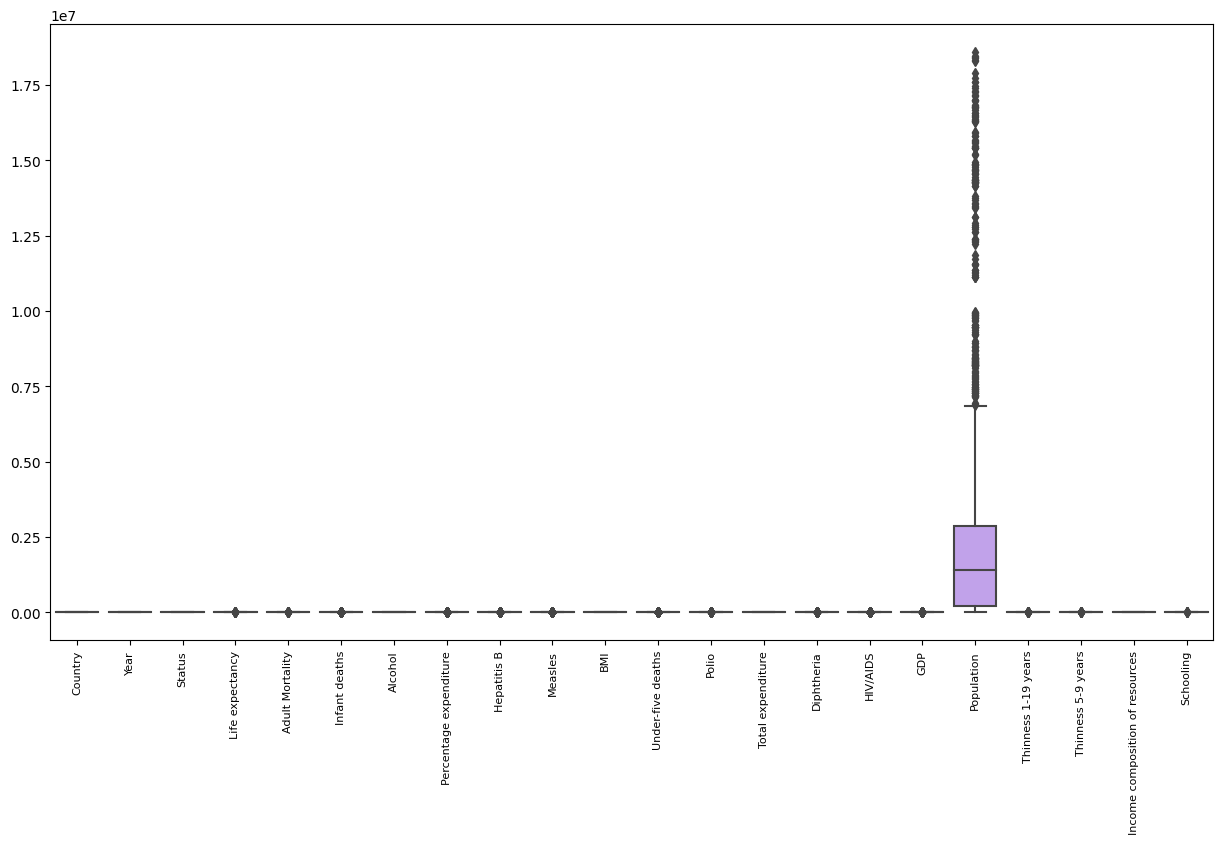

In [111]:
plt.figure(figsize=[15,8])
sns.boxplot(data=pandas_df)

labels = ['Country','Year', 'Status' ,'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
plt.xticks(range(len(labels)), labels, rotation=90, fontsize=8)

###**For further analysis, I will use the Linear Regression, Random Forest Regressor, and AutoML for generating models and run SHAP analysis on those models, for a better visualization.**bold text**

###1. Linear Regression Model

In [112]:
X = pandas_df[ ['Country', 'Year', 'Status', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]

y = pandas_df['Life expectancy']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [114]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 16.65
Coefficient of determination: 0.73
R^2 score on test set = 0.7341327153831282


In [115]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     233.1
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:31:39   Log-Likelihood:                -4137.2
No. Observations:                1484   AIC:                             8316.
Df Residuals:                    1463   BIC:                             8428.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Country                            -0.0005      0.003     -0.176      0.861      -0.006       0.005
Year                               -0.0426      0.027     -1.587      0.113      -0.095       0.010
Status                            130.3936     53.762      2.425      0.015      24.934     235.853
Adult Mortality                    -0.0195      0.001    -16.103      0.000      -0.022      -0.017
Infant deaths                      -0.0142      0.017     -0.859      0.391      -0.047       0.018
Alcohol                            -0.1756      0.035     -5.047      0.000      -0.244      -0.107
Percentage expenditure              0.0005      0.001      0.821      0.412      -0.001       0.002
Hepatitis B                        -0.0034      0.011     -0.313      0.754      -0.025       0.018
Measles                            -0.0018      0.001     -2.854      0.004      -0.003      -0.001
BMI                                 0.0088      0.007      1.269      0.204      -0.005       0.022
Under-five deaths                   0.0221      0.012      1.794      0.073      -0.002       0.046
Polio                               0.0344      0.021      1.665      0.096      -0.006       0.075
Total expenditure                   0.1871      0.049      3.817      0.000       0.091       0.283
Diphtheria                         -0.0045      0.022     -0.200      0.841      -0.048       0.039
HIV/AIDS                            0.9536      0.411      2.320      0.020       0.147       1.760
GDP                                -0.0001   7.33e-05     -1.655      0.098      -0.000    2.25e-05
Population                       4.232e-08   2.67e-08      1.588      0.113   -9.96e-09    9.46e-08
Thinness 1-19 years                 0.0285      0.077      0.369      0.712      -0.123       0.180
Thinness 5-9 years                 -0.1723      0.078     -2.208      0.027      -0.325      -0.019
Income composition of resources    41.0518      1.835     22.377      0.000      37.453      44.650
Schooling                          -0.1018      0.089     -1.138      0.255      -0.277       0.074
==============================================================================
Omnibus:                       88.489   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.509
Skew:                          -0.017   Prob(JB):                     3.16e-79
Kurtosis:                       5.418   Cond. No.                     2.54e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+09. This might indicate that there are
strong multicollinearity or o

####Shap Analysis for Linear Regression Model

In [116]:
shap.initjs()


In [117]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

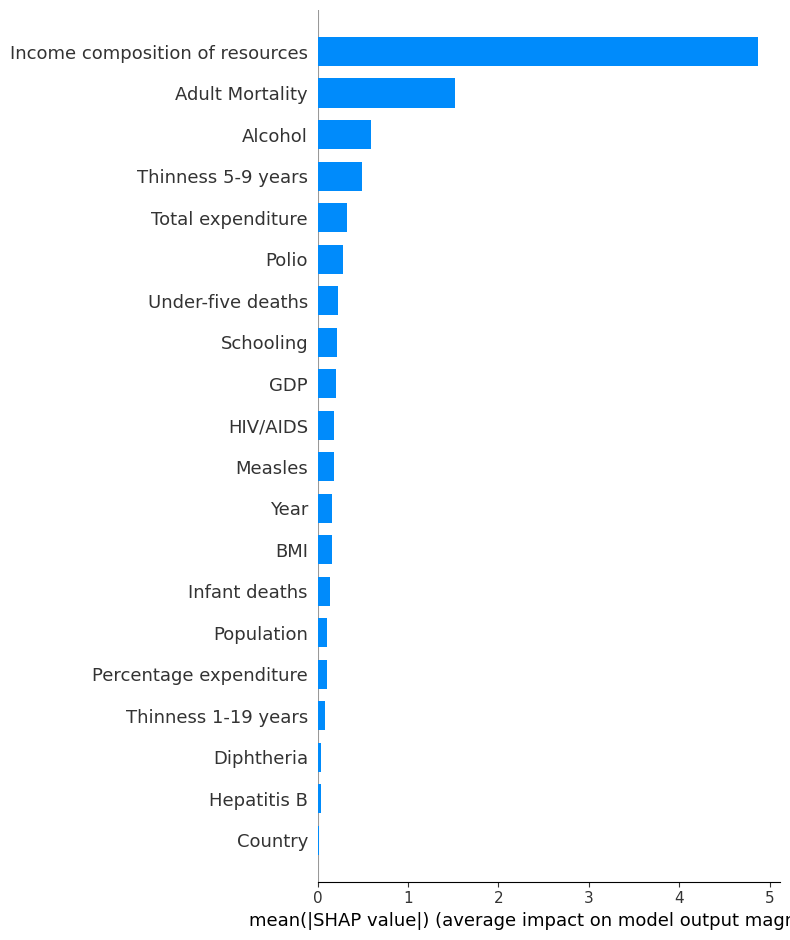

In [118]:
# shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar")

From the plot above, it is known that **"Income composition of resources"** is the most effective feature in the Linear Regression model, followed by **"Adult Mortality"**

**In the summary plot given below:**

- The Y-axis represents the names of the features in order of their importance, from top to bottom.
- The SHAP value on the X-axis represents the degree of change in the log.
- The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.
- Each point represents a row of data from the original dataset.


If you look at the feature “Income composition of resources", you will see that it is mostly high with a positive SHAP value. It means higher income composition of resources tends to positively affect the output.

Adversely, for a feature such as "Adult Mortality", a high adult mortality value tends to negatively affect the output.

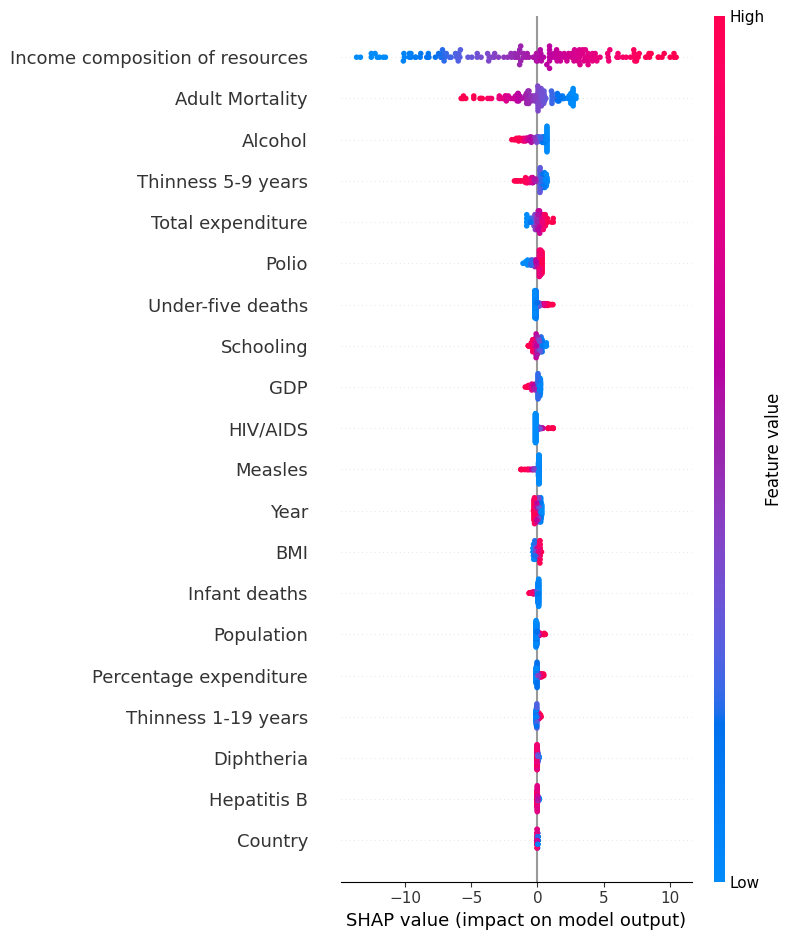

In [119]:
shap.summary_plot(shap_values, X_test)


Partial Dependency Plots

**The plots below are partial dependence plots that describe how the top features in the SHAP analysis affect the model.**

As you can see, my model has many features, so it is cumbersome to plot every feature's partial dependence plot. I prefer the SHAP method, as it gives a clear understanding of the features important for our analysis, so I won't be providing a PDP for the next models.

In [120]:
def partial_dependence_plot(feature, idx = None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx : idx+1,:])

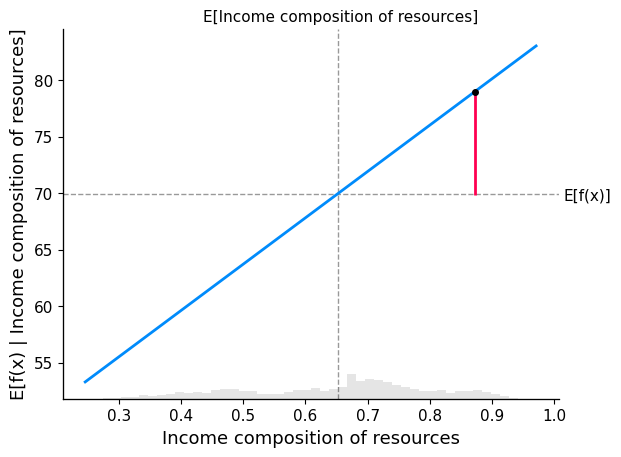

In [121]:
partial_dependence_plot('Income composition of resources', 0)


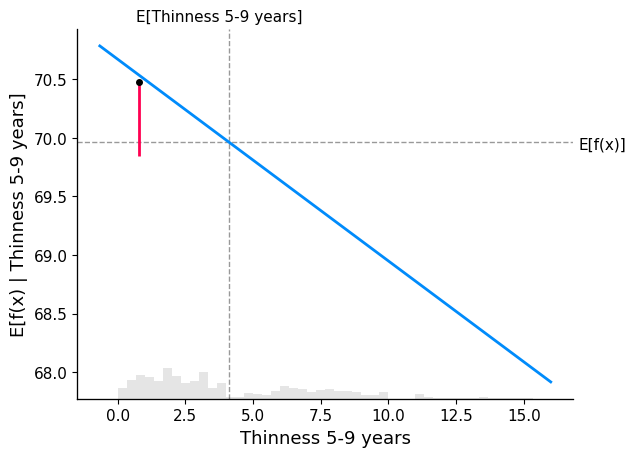

In [122]:
partial_dependence_plot('Thinness 5-9 years', 0)

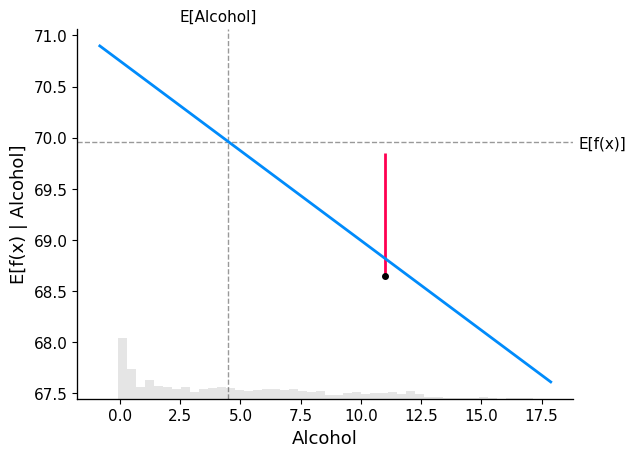

In [123]:
partial_dependence_plot('Alcohol', 0)

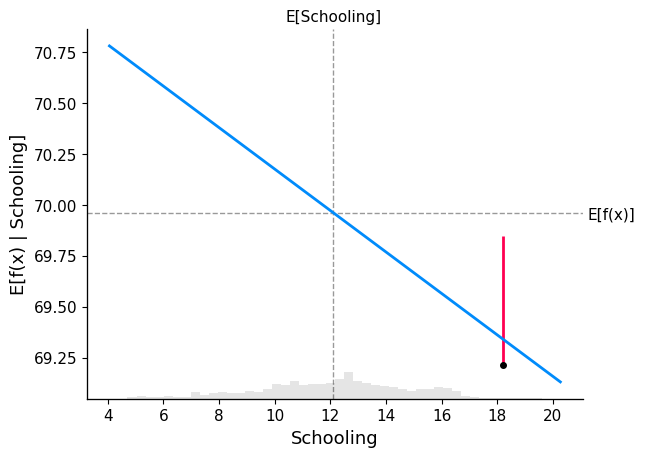

In [124]:
partial_dependence_plot('Schooling', 0)


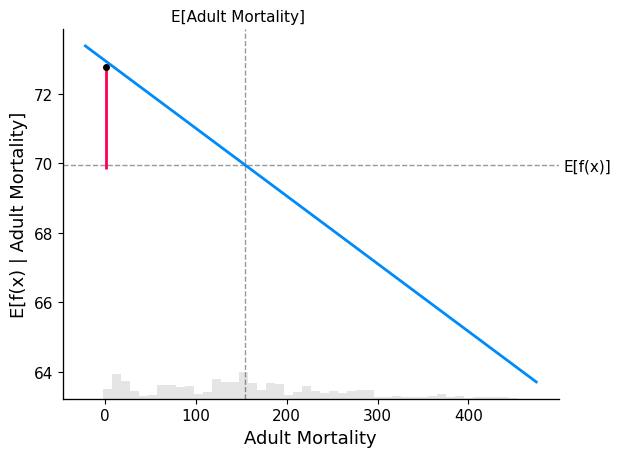

In [125]:
partial_dependence_plot('Adult Mortality', 0)


**The waterfall plot** below showcases the units on the x-axis as log-odds units, and the Y-axis as feature names. The gray text before the feature names shows the value of each feature for this sample.

Note that in the above plot, the 8 least impactful features have been collapsed into a single term so that we don't show more than 13 rows in the plot.

Each row displays the positive (red) or negative (blue) impact of each feature on the model output for a specific prediction.

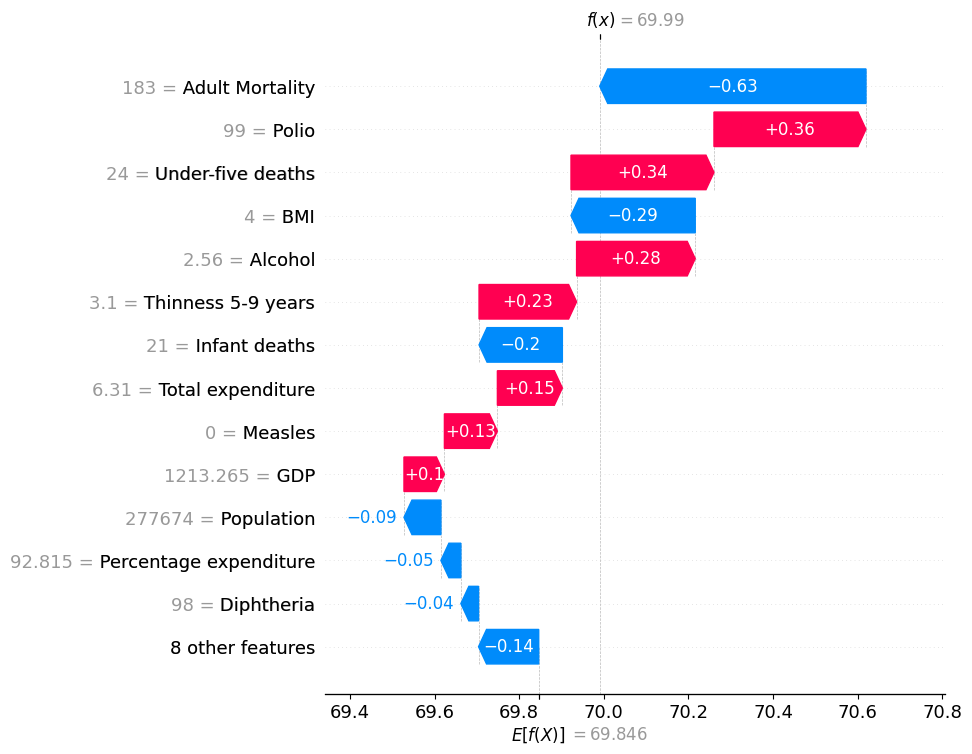

In [126]:
idx = 18
shap.plots.waterfall(shap_values[idx], max_display=14)

The red color means a higher value of a feature. Blue means the lower value of a feature. The base value here is given as 69.846, which is the average predicted value of the Life expectancy.

"Adult mortality" decreases the expectancy of the predicted feature/variable significantly, whereas, "Polio" increases the Life expectancy rate the most out of all the other variables.

**"Polio", "Under five deaths", "Alcohol", "Thinness 5-9 years", "Total Expenditure", "Measles", and "GDP"** are responsible for the **increase in the Life Expectancy rate**, while the **other features** are responsible for **decreasing the Life Expectancy rate.**

###2. Random Forest Model

In [127]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [128]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 6.67
Coefficient of determination: 0.89
R^2 score on test set = 0.8935398796061627


**Below we will visualize the features that are important from their coefficients.**

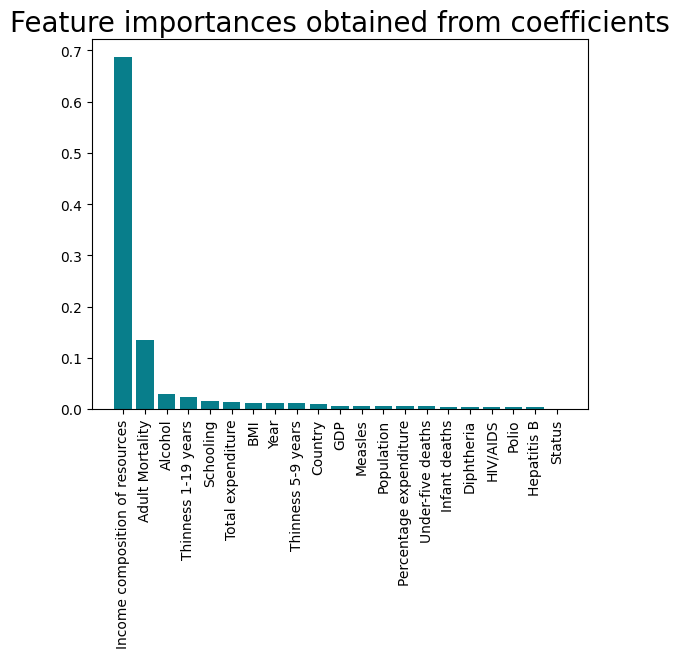

In [129]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Here we notice that, "Income composition of resources" has been the most important feature followed by "Adult Mortality".**

####SHAP Analysis for the Randomforest Regressor Model

In [130]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 166it [01:39,  1.56it/s]


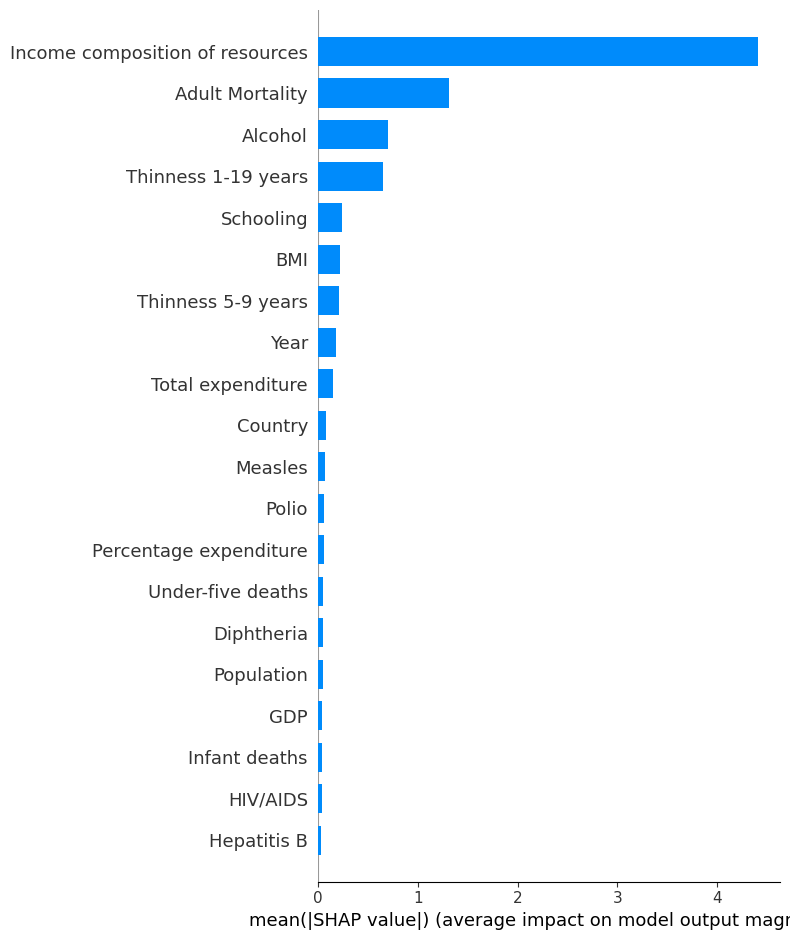

In [131]:
# shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar")

If you look at the plot below, the feature “Income composition of resources", is mostly high with a positive SHAP value. It means higher income composition of resources tends to positively affect the output.

Adversely, for features such as "Adult Mortality", and "Alcohol", a high adult mortality value tends to negatively affect the output.

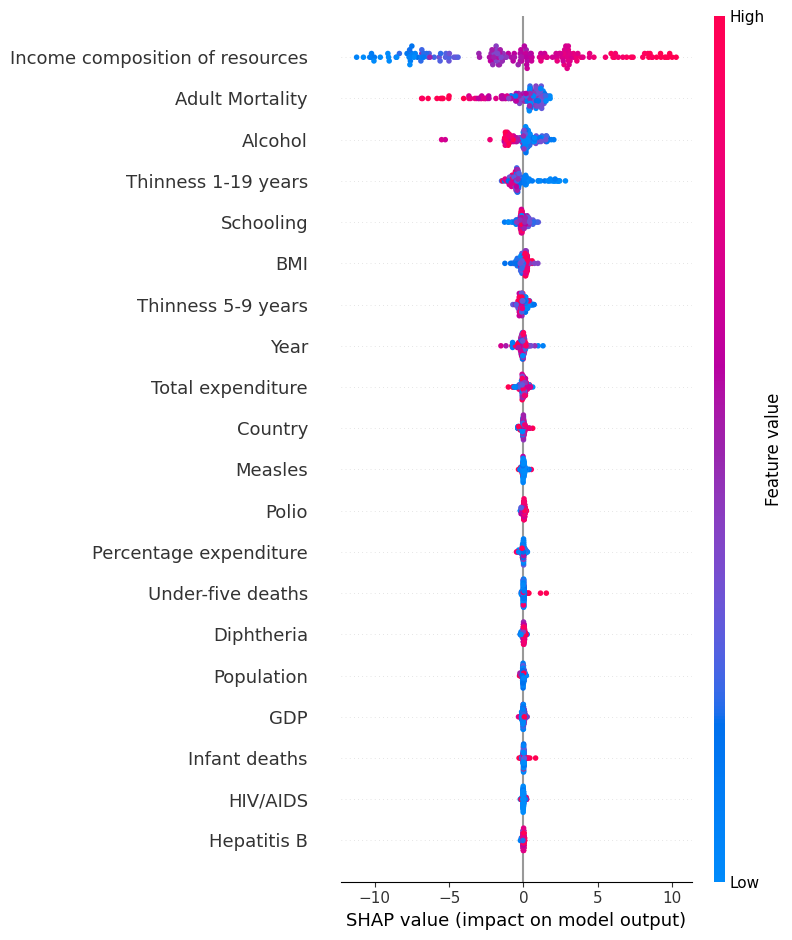

In [132]:
shap.summary_plot(shap_values, X_test)


The base value in the below waterfall plot is given as 70.5, which is the average predicted value of the Life expectancy.

"Income composition of resources" decreases the expectancy of the predicted feature/variable significantly, whereas, "Alcohol" increases the Life expectancy rate the most out of all the other variables.

**"Polio", "Diphtheria", "Alcohol", "Adult Mortality", "Total Expenditure", "Measles", "Measles", and "Schooling"** are responsible for the **increase in the Life Expectancy rate**, while the **other features** are responsible for **decreasing the Life Expectancy rate.**

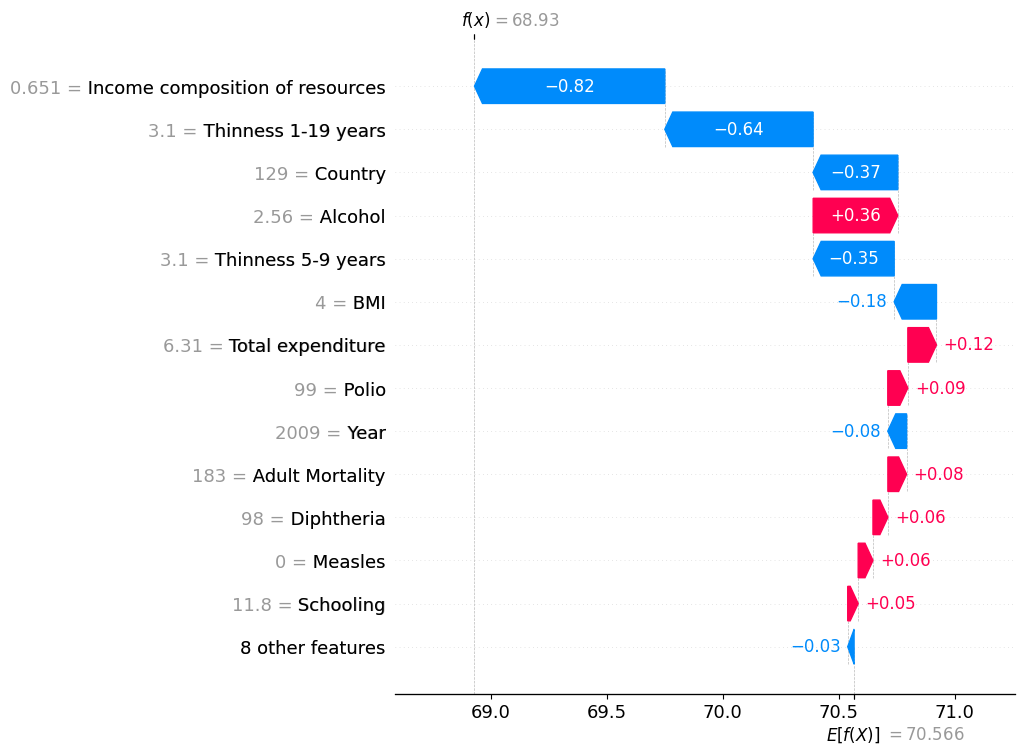

In [133]:
#Waterfall Plot
idx = 18
shap.plots.waterfall(shap_values[idx], max_display=14)

###3. AutoML

In [134]:
!pip install --no-cache-dir flask --user


In [135]:
!pip install h2o

In [136]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,31 mins 07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_oxudlq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.646 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [137]:
data = h2o.H2OFrame(pandas_df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [138]:
data.head()


Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65,263,3,0.01,71.2796,65,15,19.1,4,93,8.16,65,0.1,584.259,1.41963e+06,3,3.2,0.479,10.1
0,2014,1,59.9,271,3,0.01,73.5236,62,492,18.6,4,58,8.18,62,0.1,612.697,327582,3,3.2,0.476,10
0,2013,1,59.9,268,3,0.01,73.2192,64,430,18.1,4,62,8.13,64,0.1,631.745,1.41963e+06,3,3.2,0.47,9.9
0,2012,1,59.5,272,3,0.01,78.1842,67,15,17.6,4,67,8.52,67,0.1,669.959,3.69696e+06,3,3.2,0.463,9.8
0,2011,1,59.2,275,3,0.01,7.09711,68,15,17.2,4,68,7.87,68,0.1,63.5372,2.9786e+06,3,3.2,0.454,9.5
0,2010,1,58.8,279,3,0.01,79.6794,66,15,16.7,4,66,9.2,66,0.1,553.329,2.88317e+06,3,3.2,0.448,9.2
0,2009,1,58.6,281,3,0.01,56.7622,63,15,16.2,4,63,9.42,63,0.1,445.893,284331,3,3.2,0.434,8.9
0,2008,1,58.1,287,3,0.03,25.8739,64,15,15.7,4,64,8.33,64,0.1,373.361,2.72943e+06,3,3.2,0.433,8.7
0,2007,1,57.5,295,3,0.02,10.9102,63,15,15.2,4,63,6.73,63,0.1,369.836,1.41963e+06,3,3.2,0.415,8.4
0,2006,1,57.3,295,3,0.03,17.1715,64,15,14.7,4,58,7.43,92,0.1,272.564,2.58934e+06,3,3.2,0.405,8.1


In [139]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])


In [140]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

In [141]:
drift_data["is_train"].table()


is_train,Count
0,405
1,1244


In [142]:
x = list(set(train.col_names) - set(["Life expectancy"]))


In [143]:
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="Life expectancy", training_frame=train)

AutoML progress: |
16:03:08.334: _train param, Dropping bad and constant columns: [Status, is_train]
16:03:21.107: _train param, Dropping bad and constant columns: [Status, is_train]
16:03:23.345: _train param, Dropping bad and constant columns: [Status, is_train]
16:03:32.858: _train param, Dropping bad and constant columns: [Status, is_train]
16:03:37.557: _train param, Dropping bad and constant columns: [Status, is_train]
16:03:49.424: _train param, Dropping bad and constant columns: [Status, is_train]
16:03:53.193: _train param, Dropping bad and constant columns: [Status, is_train]
16:03:57.938: _train param, Dropping bad and constant columns: [Status, is_train]
16:04:02.82: _train param, Dropping bad and constant columns: [Status, is_train]
16:04:05.627: _train param, Dropping bad and constant columns: [Status, is_train]
16:04:16.55: _train param, Dropping unused columns: [Status, is_train]
16:04:17.390: _train param, Dropping unused columns: [Status, is_train]
16:18:01.449: New m

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [144]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231202_160308,1.44304,2.56937,6.60166,0.0400788,6.60166
StackedEnsemble_BestOfFamily_1_AutoML_1_20231202_160308,1.45174,2.59172,6.71703,0.0404837,6.71703
GBM_8_AutoML_2_20231202_161801,1.513,2.64851,7.0146,0.0414137,7.0146
GBM_12_AutoML_3_20231202_163409,1.513,2.64851,7.0146,0.0414137,7.0146
GBM_4_AutoML_1_20231202_160308,1.513,2.64851,7.0146,0.0414137,7.0146
GBM_11_AutoML_3_20231202_163409,1.51853,2.59268,6.722,0.0404547,6.722
GBM_3_AutoML_1_20231202_160308,1.51853,2.59268,6.722,0.0404547,6.722
GBM_7_AutoML_2_20231202_161801,1.51853,2.59268,6.722,0.0404547,6.722
GBM_10_AutoML_3_20231202_163409,1.52187,2.62539,6.89266,0.0408868,6.89266
GBM_2_AutoML_1_20231202_160308,1.52187,2.62539,6.89266,0.0408868,6.89266


In [145]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4.787240157299935
RMSE: 2.1879762698210268
MAE: 1.2780072960295619
RMSLE: 0.03362958601484547
Mean Residual Deviance: 4.787240157299935
R^2: 0.9298081551512508
Null degrees of freedom: 404
Residual degrees of freedom: 397
Null deviance: 27626.05209518756
Residual deviance: 1938.8322637064737
AIC: 1801.5516134032453

In [146]:
# Help function
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class


In [147]:
#Reading dataset
data = pd.read_csv('https://raw.githubusercontent.com/akshitapathania7/Model_Interpretability/main/Life_Expectancy_Data.csv')

In [148]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [150]:
data = data.rename(columns={'Life expectancy ': 'Life expectancy'})
data = data.rename(columns={'Measles ': 'Measles'})
data = data.rename(columns={'infant deaths': 'Infant deaths'})
data = data.rename(columns={'percentage expenditure': 'Percentage expenditure'})
data = data.rename(columns={' BMI ': 'BMI'})
data = data.rename(columns={'under-five deaths ': 'Under-five deaths'})
data = data.rename(columns={'Diphtheria ': 'Diphtheria'})
data = data.rename(columns={' HIV/AIDS': 'HIV/AIDS'})
data = data.rename(columns={' thinness  1-19 years': 'Thinness 1-19 years'})
data = data.rename(columns={' thinness 5-9 years': 'Thinness 5-9 years'})

In [151]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Country', 'Status']

# Apply label encoding to each column
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [152]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [153]:
X = data[['Country', 'Year', 'Status', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling']]
y = data['Life expectancy']

#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [154]:
feature_names = list(X_train.columns)
h2o_wrapper = H2OProbWrapper(best_model,feature_names)

In [155]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob,X_train[:50])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [156]:
shap_values = explainer.shap_values(X_test[:50])


  0%|          | 0/50 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

Here again we notice the top two important features to be "Income composition of resources" and "Adult Mortality".

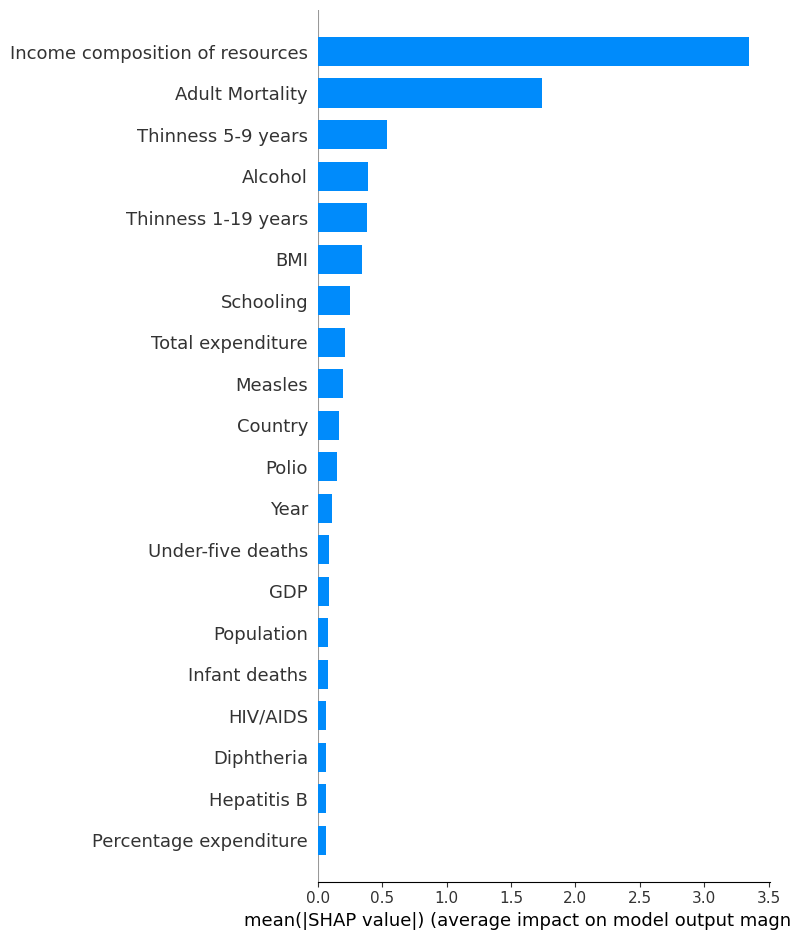

In [157]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


We can visibly see a slight change below in the plot as compared to the Linear Regression and Random Forest Regressor model.

Here the data points are sparsely distanced with a more or less similar trend to the previous two models.

A high value of "Income composition of resources" feature will have a positive impact on the predicted variable (it would increase the Life expectancy rate).

Adversely a higher Adult Mortality value would lead to a negative SHAP value, adversely affecting the predicted variable (it would decrease the Life Expectancy rate).

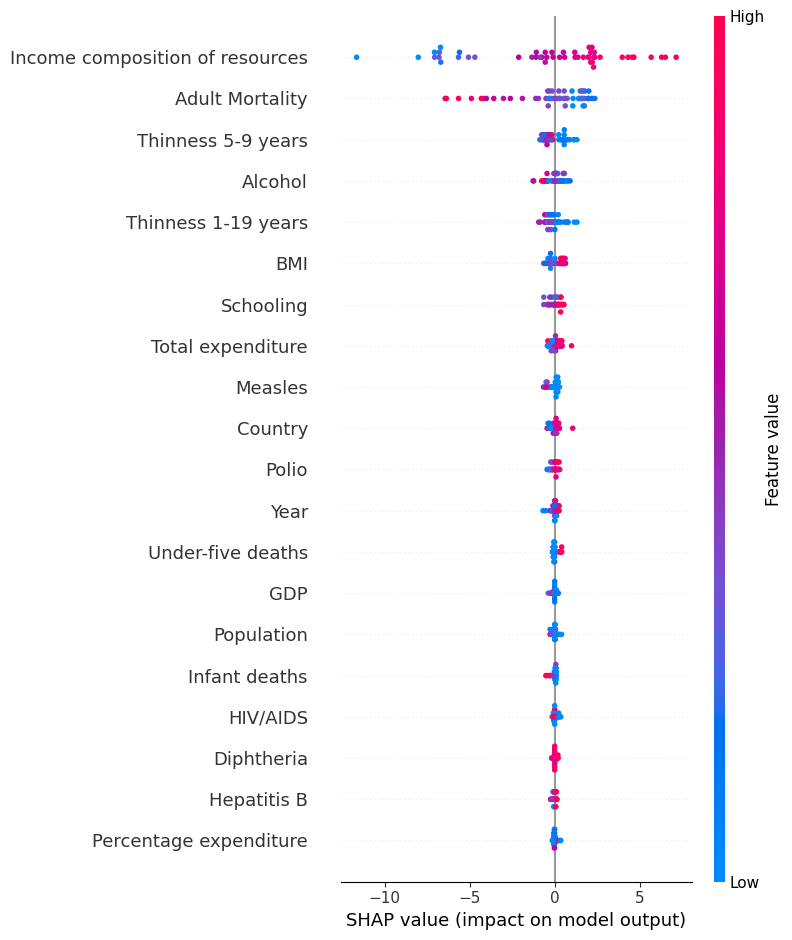

In [158]:
shap.summary_plot(shap_values, X_test[:50])


#**Conclusion**

Different models were analyzed using the SHAP values. The SHAP values were interpreted for Linear Regression, Random Forest regressor, and AutoML models.

#**References**

- SHAP documentation: https://shap.readthedocs.io/en/latest/
- Linear Regression: https://www.ibm.com/topics/linear-regression#:~:text=Resources-,What%20is%20linear%20regression%3F,is%20called%20the%20independent%20variable.
- Github: https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/smoke_detection_model_interpretibility.ipynb
- ChatGPT - https://chat.openai.com/chat

70% code is written by me with the other 30% referenced and modified from various sources such as stackoverflow geeksfor. geeks and ChatGPT

#**License**

Copyright 2023 akshitapathania7

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.